First Run the cell below to import all the packages you will need. If an error prints out below, follow printed instructions.

In [1]:
try:
    import csv
except:
    print "Download csv"
    print "you can try 'pip install csv'"
try:
    import numpy as np
except:
    print "Download numpy"
    print "you can try 'pip install numpy'"
try:
    import glob
except:
    print "Download glob"
    print "you can try 'pip install glob'"
try:    
    import pandas as pd
except:
    print "Download pandas"
    print "you can try 'pip install pandas'"
    
try:
    from scipy import stats
except:
    print "Download scipy"
    print "you can try 'pip install scipy'"
    
try:
    import matplotlib.pyplot as plt
    %matplotlib inline  
except:
    print "Problem with Matplotlib.pyplot"
    print "you can try 'pip install matplotlib'"

Next, run the cell below to run the linear regression.

                name  unique words  year
4                pdr           101  2005
9               thug           160  2005
12        unfaithful           126  2006
6             shutup           114  2007
11          umbrella           158  2007
5            rudeboy            85  2009
3   lovethewayyoulie           212  2010
7                 sm            82  2010
13       whatsmyname           160  2010
0               cake            63  2011
8               stay            93  2012
1            dancing            64  2015
10      towardthesun            79  2015
2             kissit            73  2016
14              work           178  2016
---------------------------------------------
p-value: 0.314179027473
r-squared: 0.0777655073124
slope: -3.34766118837
intercept: 6846.22503161
---------------------------------------------


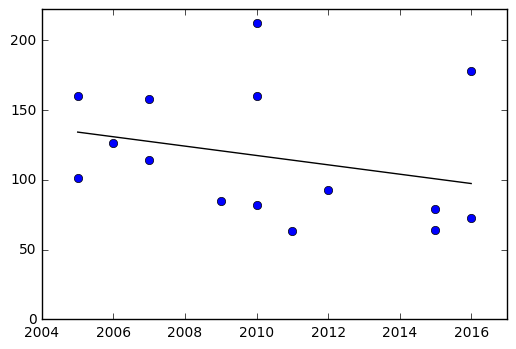

In [2]:
rhianna_data = []

x = {'umbrella': 2007, 'work': 2016, 'pdr': 2005, 'stay': 2012, 'sm': 2010, 'cake': 2011,
 'unfaithful': 2006, 'lovethewayyoulie': 2010, 'dancing': 2015, 'rudeboy': 2009,
    'whatsmyname': 2010, 'shutup': 2007, 'thug': 2005, 'towardthesun': 2015, 'kissit':2016, 'dontStop': 2009}

songList = glob.glob('*.txt')
for song in songList:
    unique_items = len(set(w.lower().replace(",", "").replace("(","").replace(")","").replace(".", "").replace("?", "") for w in open(song).read().split()))
    name = song.split('.')[0]
    rhianna_data.append([name, unique_items, x[name]])
    

dataFrame = pd.DataFrame(rhianna_data)
dataFrame.columns = ['name', 'unique words', 'year']
dataFrame = dataFrame.sort_values(by = 'year')
print dataFrame

x = np.array(dataFrame['year'].tolist())
y = np.array(dataFrame['unique words'].tolist())
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

plt.plot(x, y, 'o')
plt.plot(x, predict_y, 'k-')
plt.xlim((2004,2017))
plt.ylim(0, max(y)+10)

print "---------------------------------------------"
print "p-value: " + str(p_value)
print "r-squared: " + str(r_value**2)
print "slope: " + str(slope)
print "intercept: " + str(intercept)
print "---------------------------------------------"

plt.show()


1. In what year will Rhianna be singing 0 words?

In [5]:
dataFrame.to_csv('BadGalRiRi.csv')